In [ ]:
import pandas as pd, datetime as dt, numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 128)

## Lesen der Logdatei

In [136]:
dateparser = lambda values: pd.to_datetime(values, format='%Y-%m-%dT%H:%M:%S')
logs = pd.read_csv("log_unicode.txt", sep="\t", encoding="utf_16",
    parse_dates=["RequestDate"],
    date_parser=dateparser).convert_dtypes()
logs["Day"] = logs.RequestDate.dt.floor(freq="D")
logs["Hour"] = logs.RequestDate.dt.floor(freq="H")
logs.dtypes

RequestDate        datetime64[ns]
ClientIp                   string
RequestUrl                 string
BytesIn                     Int64
BytesOut                    Int64
ServerDomain               string
ServerIp                   string
ServerBandwidth             Int64
StatusCode                  Int64
StatusName                 string
Day                datetime64[ns]
Hour               datetime64[ns]
dtype: object

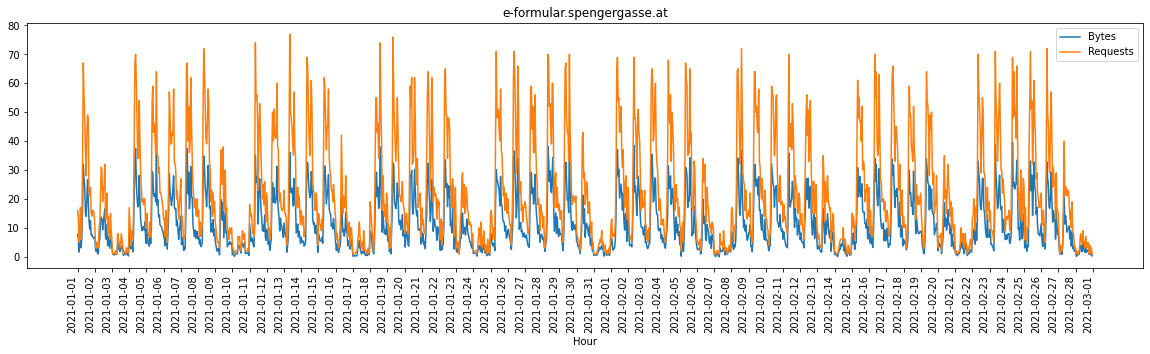

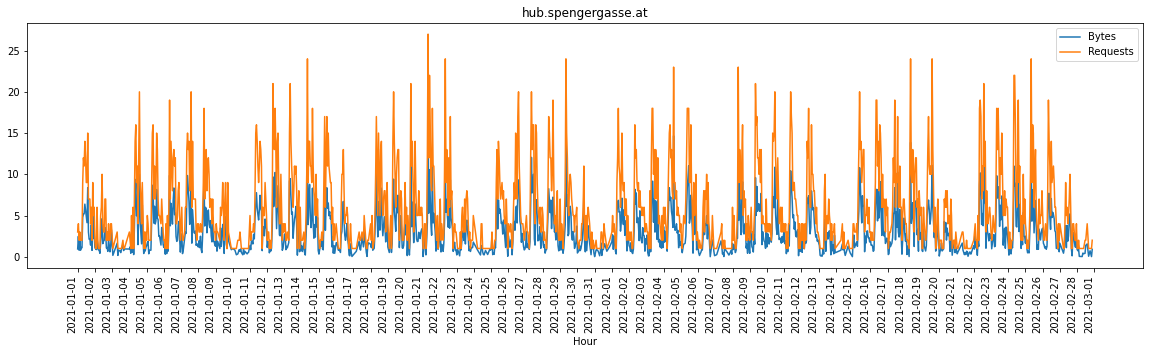

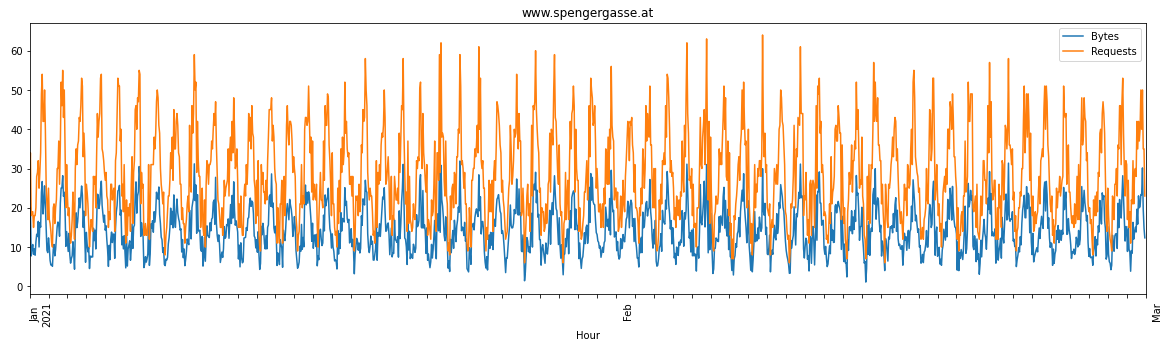

In [135]:
hourly = logs[(logs.Hour < pd.to_datetime('2021-03-01')) & (logs.Hour >= pd.to_datetime('2021-01-01'))]
hourly = hourly.groupby(["ServerDomain", "Hour"], as_index=False) \
    .aggregate(Bytes=("BytesOut", "sum"), Requests=("ServerDomain", "size"))
hourly["Bytes"] = hourly.Bytes / 1024 / 1024
xticks = pd.date_range(start='2021-01-01', end='2021-03-01', freq='D')
for domain, values in hourly.groupby("ServerDomain"):
    values.set_index("Hour").plot(xticks=xticks,rot=90,title=domain,  figsize=(20,5))